

## Table of Contents
<ul>
<li><a href="#Gathering">Gathering</a></li>
<li><a href="#Assesing">Assesing</a></li>
<li><a href="#Observations">Observations</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
<li><a href="#Analyzing">Analyzing</a></li>
</ul>

### importing libraries

In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import tweepy
import json


<a id='Gathering'></a>
## Gathering

In [3]:
# download twitter_archive_enhanced2.csv
# should be downloaded manually as file was given
df_archive = pd.read_csv('/Users/glenndinomangowal/Desktop/Git/wrangle-project/twitter-archive-enhanced-2.csv')

In [4]:
# download tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('/Users/glenndinomangowal/Desktop/Git/wrangle-project/' + url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [5]:
df_prediction = pd.read_csv('/Users/glenndinomangowal/Desktop/Git/wrangle-project/image-predictions.tsv', sep='\t')

In [6]:
#convert text file into a dataframe
df_txt = []

with open('/Users/glenndinomangowal/Desktop/Git/wrangle-project/tweet-json copy') as file:
    for line in file:
        df_txt.append(json.loads(line))

In [7]:
df_tweet = pd.DataFrame(df_txt)

<a id='Assesing'></a>
## Assesing

In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# checking what the column text is like
df_archive['text'][20]

"This is Gerald. He was just told he didn't get the job he interviewed for. A h*ckin injustice. 12/10 didn't want the job anyway https://t.co/DK7iDPfuRX"

In [9]:
df_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [10]:
df_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [11]:
df_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [12]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Alfy          1
Miguel        1
Florence      1
Strudel       1
Combo         1
Name: name, Length: 957, dtype: int64

In [13]:
#checking for rating denominator that is not a 10
df_archive[df_archive['rating_denominator']!=10].loc[0:, : ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [14]:
df_tweet

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [15]:
# checking if theres any duplicated tweet_id
df_tweet[df_tweet.id.duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


In [16]:
#checking the columns that are linked between the different datasets
all_columns = pd.Series(list(df_archive) + list(df_tweet) + list(df_prediction))
all_columns[all_columns.duplicated()]

25                   source
26    in_reply_to_status_id
28      in_reply_to_user_id
48                 tweet_id
dtype: object

In [18]:
df_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### Quality
##### `df_archive` table
- `timestamp` is string instead of datetime
- after splitting `timestamp` into `date` & `time`, convert the two columns data types into datetime
- remove `timestamp` column
- Remove unnecessary columns, such as `retweeted status id` and `retweeted status timestamp` columns
- Remove unnecessary columns, such as `in-reply to status id` & `in-reply to user` columns
- Clean `text` column from URLs and rating
- `name` column has multiple invalid names
- `expanded_urls` column has NaN values
- `rating_denominator` has values that aren't equal to 10

##### `df_prediction` table
- remove `img_num` column

##### `df_tweet` table
- we only want `id`,`retweet_count`,`favorite_count` columns

##### `df_master` table
- `tweet_id` should be *object* type

### Tidiness

- Extract *doggo*, *floofer*, *pupper*, and *puppo* keyword from `text` column to create a new column named `dog_stage`
- `timestamp` column should be split into *date* and *time* in `df_archive` table

- Combine `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog` into one `breed` column in `df_prediction` table

- rename `id` column to `tweet_id` in `df_tweet` table to match the other datasets
- merge all dataframes into one dataframe

<a id='Cleaning'></a>
## Cleaning

In [64]:
#copying from the original dataframes to perform data-cleaning

archive_clean = df_archive.copy()
prediction_clean = df_prediction.copy()
tweet_clean = df_tweet.copy()

##### Define

convert `timestamp` data type to *datetime* `archive_clean` table
<br/>
split date and time from `timestamp` in `archive_clean` table

##### Code

In [65]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [66]:
archive_clean['date'] = archive_clean['timestamp'].dt.date

In [67]:
archive_clean['time'] = archive_clean['timestamp'].dt.time

##### test

In [21]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

##### Define

convert `date` and `time` data type to *datetime* `archive_clean` table
<br/>
remove `timestamp` column

##### Code

In [68]:
archive_clean['date'] = pd.to_datetime(archive_clean['date'])
archive_clean['time'] = pd.to_datetime(archive_clean['time'],format='%H:%M:%S', errors='ignore')

In [69]:
del archive_clean['timestamp']

##### test

In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   source                      2356 non-null   object        
 4   text                        2356 non-null   object        
 5   retweeted_status_id         181 non-null    float64       
 6   retweeted_status_user_id    181 non-null    float64       
 7   retweeted_status_timestamp  181 non-null    object        
 8   expanded_urls               2297 non-null   object        
 9   rating_numerator            2356 non-null   int64         
 10  rating_denominator          2356 non-null   int64         
 11  name                        2356 non-null   object      

##### Define

- Extract *doggo*, *floofer*, *pupper*, and *puppo* keyword from `text` column to create a new column named `dog_stage`
##### Code

In [70]:
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

##### Test

In [71]:
archive_clean['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

##### Define

-  removing `doggo`, `floofer`, `pupper`, `puppo` columns from `archive_clean` table
##### Code

In [72]:
archive_clean = archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

In [73]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'date',
 'time',
 'dog_stage']

##### Define
- Remove unnecessary columns, such as `in-reply to status id` & `in-reply to user` columns
- Remove unnecessary columns, `source`
##### Code

In [74]:
archive_clean = archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'])

##### Test

In [75]:
list(archive_clean)

['tweet_id',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'date',
 'time',
 'dog_stage']

##### Define
removing retweet rows from the dataframe

##### Code

In [76]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

##### Test

In [81]:
archive_clean['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2175, dtype: object

##### Define

cleaning `text` column from url and rating in `tweet_clean` table


##### Code

In [82]:
archive_clean['text'] = archive_clean['text'].str.replace(r"http\S+", "")
archive_clean['text'] = archive_clean['text'].str.replace(r'\d', "")


<ipython-input-82-13c077fc1276>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['text'] = archive_clean['text'].str.replace(r"http\S+", "")
<ipython-input-82-13c077fc1276>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['text'] = archive_clean['text'].str.replace(r'\d', "")


##### Test

In [83]:
archive_clean['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. / "

##### Define

Replacing invalid names in `name` column in `archive_clean` table

##### Code

In [84]:
#replace invalid names with numpy nan
mask = archive_clean.name.str.islower() 
column_name = 'name' 
archive_clean.loc[mask, column_name] = np.nan

##### Test

In [85]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

##### Define

Removing rows that has NaN for `expanded_urls`


##### Code

In [86]:
#selecting rows that dont contain NaN instead of dropping
archive_clean = archive_clean[archive_clean['expanded_urls'].notna()]

##### test

In [87]:
# count number of null values for expanded_urls column
archive_clean.expanded_urls.isnull().sum()

0

##### Define

`rating_denominator` has values that aren't equal to 10, which makes it invalid, therefore i want only data that only has valid rating

##### Code

In [88]:
archive_clean = archive_clean[archive_clean['rating_denominator'] == 10]

##### Test

In [89]:
archive_clean.rating_denominator.unique()

array([10])

##### Define

Removing `img_num` column from `prediction_clean` table


##### Code

In [90]:
prediction_clean.drop(['img_num'], axis=1, inplace=True)

##### test

In [91]:
list(prediction_clean)

['tweet_id',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

##### Define

renaming `id` column to `tweet_id` in `tweet_clean` table to match the other datasets

##### Code


In [92]:
tweet_clean = tweet_clean.rename(columns = {'id' : 'tweet_id'})

In [93]:
list(tweet_clean)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

##### Define

removing unneccessary columns, we only want `tweet_id`,`retweet_count`,`favorite_count`
##### Code

In [94]:
tweet_clean = tweet_clean[['tweet_id','retweet_count','favorite_count']]

#### Test

In [95]:
list(tweet_clean)

['tweet_id', 'retweet_count', 'favorite_count']

##### Define

 Combining `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog` into one `breed` column in `prediction_clean` table
 
##### Code

In [96]:
breed = []

for i, row in prediction_clean.iterrows():
    max_confidence = max([row['p1_conf'], row['p2_conf'], row['p3_conf']])
        
    if row['p1_conf'] == max_confidence:
        breed.append(row['p1'])
    elif row['p2_conf'] == max_confidence:
        breed.append(row['p2'])
    elif row['p3_conf'] == max_confidence:
        breed.append(row['p3'])
    else:
        breed.append(np.nan)
        
prediction_clean['breed'] = breed

##### Test

In [97]:
prediction_clean.breed.sample(5)

1996    Labrador_retriever
1454             Chihuahua
221             toy_poodle
1345         Irish_terrier
2021           street_sign
Name: breed, dtype: object

##### Define

 Removing `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog` columns in `prediction_clean` table
 
##### Code

In [98]:
prediction_clean = prediction_clean[['tweet_id','jpg_url','breed']]

##### Test

In [99]:
list(prediction_clean)

['tweet_id', 'jpg_url', 'breed']

##### Define

Merging all three tables into one master dataframe
 
##### Code

In [100]:
df_master = pd.merge(archive_clean, prediction_clean, on=['tweet_id'])
df_master = pd.merge(df_master, tweet_clean, on=['tweet_id'])

In [101]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1976 non-null   int64         
 1   source                      1976 non-null   object        
 2   text                        1976 non-null   object        
 3   retweeted_status_id         0 non-null      float64       
 4   retweeted_status_user_id    0 non-null      float64       
 5   retweeted_status_timestamp  0 non-null      object        
 6   expanded_urls               1976 non-null   object        
 7   rating_numerator            1976 non-null   int64         
 8   rating_denominator          1976 non-null   int64         
 9   name                        1881 non-null   object        
 10  date                        1976 non-null   datetime64[ns]
 11  time                        1976 non-null   datetime64[n

##### Define

converting `tweet_id` from int to *object*


##### Code

In [104]:
df_master['tweet_id'] = df_master['tweet_id'].astype(str)
df_master['retweeted_status_id'] = df_master['retweeted_status_id'].astype(str)
df_master['retweeted_status_user_id'] = df_master['retweeted_status_user_id'].astype(str)

##### Test

In [105]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1976 non-null   object        
 1   source                      1976 non-null   object        
 2   text                        1976 non-null   object        
 3   retweeted_status_id         1976 non-null   object        
 4   retweeted_status_user_id    1976 non-null   object        
 5   retweeted_status_timestamp  0 non-null      object        
 6   expanded_urls               1976 non-null   object        
 7   rating_numerator            1976 non-null   int64         
 8   rating_denominator          1976 non-null   int64         
 9   name                        1881 non-null   object        
 10  date                        1976 non-null   datetime64[ns]
 11  time                        1976 non-null   datetime64[n

##### Define

creating new column `hour` by taking the *hour* from `time` column for analysis purposes

##### Code

In [106]:
df_master['hour'] = pd.to_datetime(df_master['time'], format='%H:%M:%S').dt.hour

##### Test

In [107]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1976 non-null   object        
 1   source                      1976 non-null   object        
 2   text                        1976 non-null   object        
 3   retweeted_status_id         1976 non-null   object        
 4   retweeted_status_user_id    1976 non-null   object        
 5   retweeted_status_timestamp  0 non-null      object        
 6   expanded_urls               1976 non-null   object        
 7   rating_numerator            1976 non-null   int64         
 8   rating_denominator          1976 non-null   int64         
 9   name                        1881 non-null   object        
 10  date                        1976 non-null   datetime64[ns]
 11  time                        1976 non-null   datetime64[n

In [108]:
df_master = df_master[df_master['dog_stage'].notna()]

<a id='Analyzing'></a>
## Analysis and Visualization

### 1

(pupper     217
 doggo       71
 puppo       28
 floofer      3
 Name: dog_stage, dtype: int64,
 array(['doggo', 'puppo', 'pupper', 'floofer'], dtype=object))

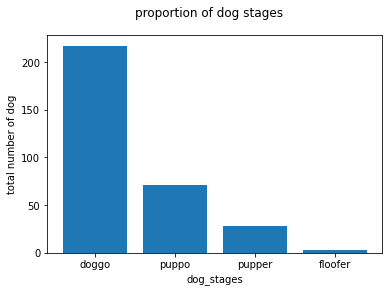

In [109]:
numberperstages = df_master['dog_stage'].value_counts()
dog_stages = df_master['dog_stage'].unique()


plt.bar(dog_stages,numberperstages)
plt.suptitle('proportion of dog stages')
plt.xlabel('dog_stages')
plt.ylabel('total number of dog')

numberperstages,dog_stages

- Here we can see that majority of the dogs have been succesfully identified in their stage are in 'doggo' stage

### 2  

In [110]:
breeds = df_master.groupby(['breed'])['breed'].count()

breeds.sort_values(ascending=False)

breed
golden_retriever           33
Labrador_retriever         16
Pembroke                   13
Pomeranian                  8
pug                         8
                           ..
black-and-tan_coonhound     1
bison                       1
birdhouse                   1
bib                         1
wool                        1
Name: breed, Length: 144, dtype: int64

- as we can see, by grouping by the breed, we are able to identify top 5 number of dogs per breed. Most of the dogs that are able to be identified from the data are golden retriever

### 3

In [111]:
#creating new variables for analysis purposes
conditions = [
    (4 <= df_master['hour']) & (df_master['hour'] <= 11),
    (11 < df_master['hour']) & (df_master['hour'] <= 17),
    (17 < df_master['hour']) & (df_master['hour'] <= 21),
    (21 < df_master['hour']) | (df_master['hour'] <= 3) ,
    
]

values = ['Morning', 'Afternoon', 'Evening', 'Night']

In [112]:
df_master['time_of_day'] = np.select(conditions, values)

In [113]:
tod_count = df_master.groupby(['time_of_day'])['time_of_day'].count()

Text(0.5, 1.0, 'Number of tweets per parts of day')

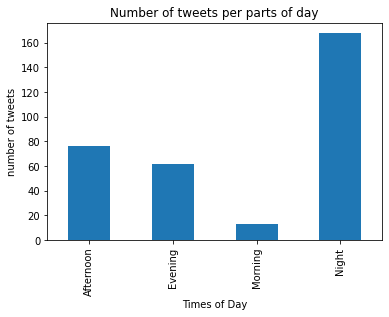

In [114]:
tod_count.plot(kind='bar')
plt.xlabel('Times of Day')
plt.ylabel('number of tweets')
plt.title('Number of tweets per parts of day')

- As we can see, most of tweets were tweeted during night time. 

### 4


<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

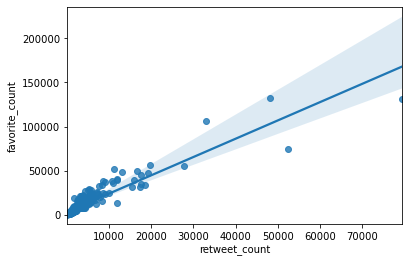

In [115]:
# checking for the relationship between retweet_count and favorite_count
sns.regplot(x=df_master.retweet_count, y=df_master.favorite_count)

#### saving the master dataframe to csv format file

In [116]:
df_master.to_csv('datawranglingproject.csv')